In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

## Path following 2R robot

In [2]:
opti = ca.Opti()
N = 20
L1, L2 = 1.0, 1.0

In [3]:
q = opti.variable(2, N)
q1 = q[0, :]
q2 = q[1, :]

In [4]:
# forward kinematics
x = L1 * ca.cos(q1) + L2 * ca.cos(q2)
y = L1 * ca.sin(q1) + L2 * ca.sin(q2)

In [5]:
# path, line from (2, 0) to (0, 2)
x_p = np.linspace(1.7, 0, N).reshape(1, N)
y_p = np.linspace(0, 1.7, N).reshape(1, N)

In [6]:
# objective
V = ca.sum2((q1[:-1] - q1[1:])**2 + (q2[:-1] - q2[1:])**2)
V.shape

(1, 1)

In [7]:
opti.minimize(V)

opti.subject_to(x == x_p)
opti.subject_to(y == y_p)

opti.solver('ipopt');

In [8]:
%%capture
sol = opti.solve()

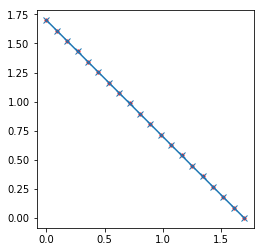

In [9]:
fig, ax = plt.subplots()

ax.plot(x_p, y_p, 'r.')
ax.plot(sol.value(x), sol.value(y), '-x')
ax.set_aspect('equal')

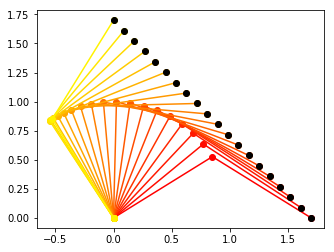

In [10]:
# forward kinematics to plot robot links
p1 = L1 * np.vstack((np.cos(sol.value(q1)), np.sin(sol.value(q1))))
p2 = p1 + L2 * np.vstack((np.cos(sol.value(q2)), np.sin(sol.value(q2))))
X = np.vstack((np.zeros(N), p1[0], p2[0]))
Y = np.vstack((np.zeros(N), p1[1], p2[1]))

# create color gradient
cMap = cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=N), cmap=plt.get_cmap('autumn'))

fig, ax = plt.subplots()


for i in range(N):
    ax.plot(X[:, i], Y[:, i], '-o', c=cMap.to_rgba(i))

ax.plot(x_p, y_p, 'ko')
ax.set_aspect('equal')